# Chicago Crime Rate

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
chicago_data1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\david\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
chicago_data2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'


In [4]:
chicago_data3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [5]:
chicago_data4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

In [6]:
chicago_crime = pd.concat([chicago_data1,chicago_data2,chicago_data3,chicago_data4],axis=0)

In [7]:
del chicago_data1,chicago_data2,chicago_data3,chicago_data4

In [8]:
chicago_crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,"(41.745251975, -87.552773464)"


In [9]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [10]:
chicago_crime.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [11]:
chicago_crime

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [12]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Block                 object
 3   Primary Type          object
 4   Description           object
 5   Location Description  object
 6   Arrest                bool  
 7   Domestic              bool  
dtypes: bool(2), int64(1), object(5)
memory usage: 439.3+ MB


In [15]:
chicago_crime.Date = pd.to_datetime(chicago_crime.Date , format= '%m/%d/%Y %I:%M:%S %p'  )

In [50]:
chicago_crime.drop(['ID'],axis=1,inplace=True)

In [51]:
chicago_crime.index = pd.DatetimeIndex(chicago_crime.Date)

In [52]:
chicago_crime

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [53]:
chicago_crime['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

<AxesSubplot:>

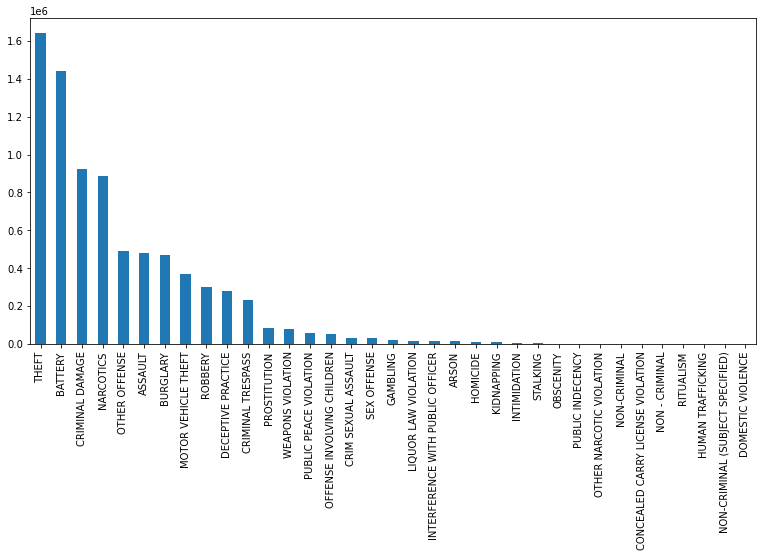

In [24]:
plt.figure(figsize=(13,6))
chicago_crime['Primary Type'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

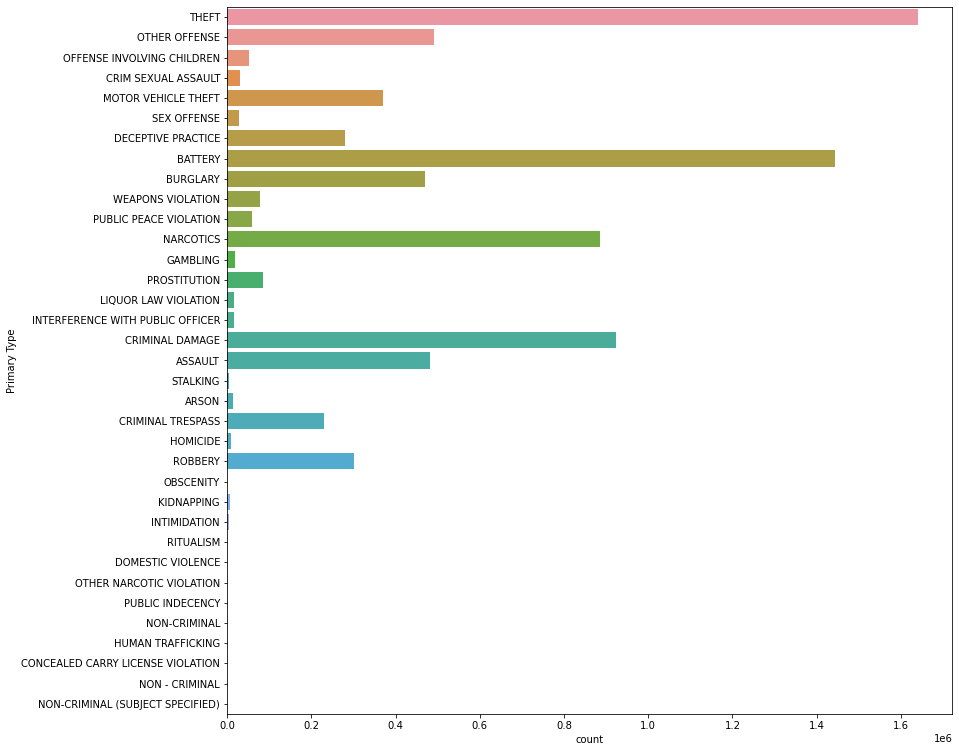

In [36]:
plt.figure(figsize=(13,13))

sns.countplot(y= chicago_crime['Primary Type'])

In [42]:
chicago_crime['Location Description'].value_counts()

STREET                 2101842
RESIDENCE              1341749
SIDEWALK                815595
APARTMENT               812512
OTHER                   294286
                        ...   
CLEANERS/LAUNDROMAT          1
FUNERAL PARLOR               1
LIVERY AUTO                  1
TRUCKING TERMINAL            1
ROOMING HOUSE                1
Name: Location Description, Length: 172, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Location Description'>

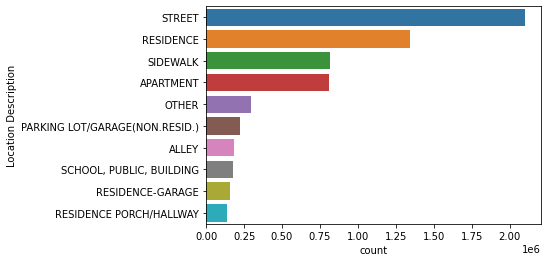

In [48]:
sns.countplot(y=chicago_crime['Location Description'],
              order = chicago_crime['Location Description'].value_counts().iloc[:10].index)

In [89]:
chicago_crime_year = pd.DataFrame(chicago_crime.resample('Y').size())
chicago_crime_year

,0
Date,
2001-12-31,568518
2002-12-31,490879
2003-12-31,475913
2004-12-31,388205
2005-12-31,455811
2006-12-31,794684
2007-12-31,621848
2008-12-31,852053
2009-12-31,783900


<AxesSubplot:title={'center':'number of crimes per year'}, xlabel='Date'>

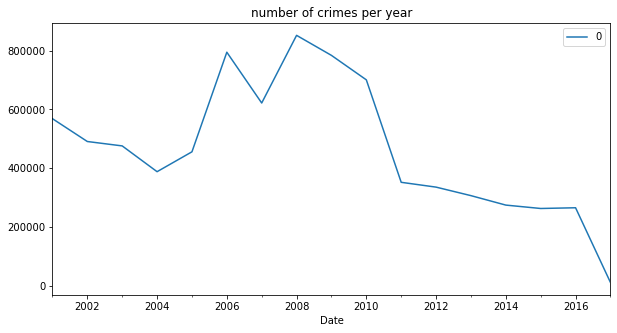

In [90]:
chicago_crime_year.plot(kind = 'line',figsize=(10,5),title='number of crimes per year')

In [111]:
chicago_crime_month = pd.DataFrame(chicago_crime.resample('m').size())

<AxesSubplot:title={'center':'number of crimes per month'}, xlabel='Date'>

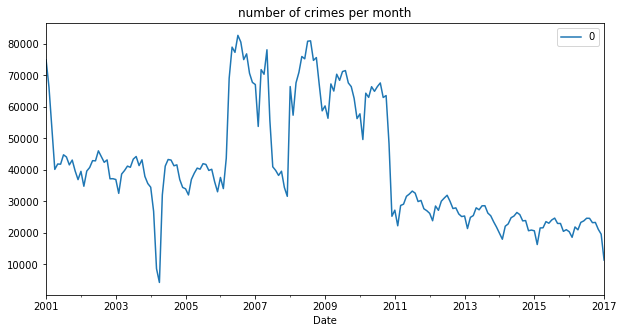

In [112]:
chicago_crime_month.plot(kind = 'line',figsize=(10,5),title='number of crimes per month')

In [113]:
chicago_crime_month.reset_index(inplace=True)

In [114]:
chicago_crime_month.columns = ['ds','y']

In [115]:
chicago_crime_month

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [116]:
m = Prophet()

In [117]:
m.fit(chicago_crime_month) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2001-01-31
1,2001-02-28
2,2001-03-31
3,2001-04-30
4,2001-05-31
...,...
553,2018-01-27
554,2018-01-28
555,2018-01-29
556,2018-01-30


In [124]:
forecast = m.predict(future)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,23113.382234,54948.297396,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,17641.765542,49679.723954,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,22933.603443,53389.410586,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,23553.773430,55327.001144,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,28937.189799,61949.426110,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9103.019235,-8871.743586,22826.018690,8845.869649,9343.280031,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,0.0,0.0,0.0,5679.327501
554,2018-01-28,9089.027815,-10277.101227,21503.139145,8830.670032,9330.352666,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,0.0,0.0,0.0,6318.312036
555,2018-01-29,9075.036395,-9590.944330,23918.213351,8815.470414,9317.425302,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,0.0,0.0,0.0,6841.166877
556,2018-01-30,9061.044974,-7452.051570,23402.874101,8800.274978,9304.497938,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,0.0,0.0,0.0,7222.424715


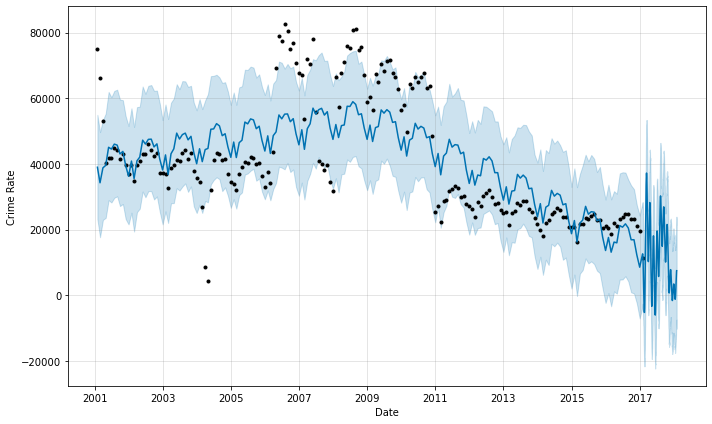

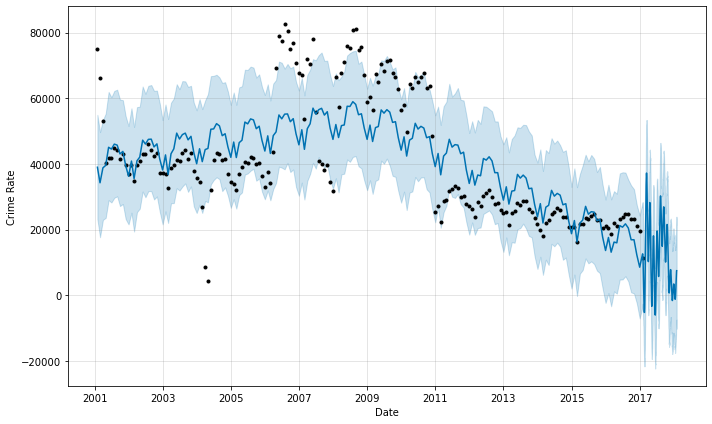

In [126]:
m.plot(forecast,xlabel='Date',ylabel='Crime Rate')

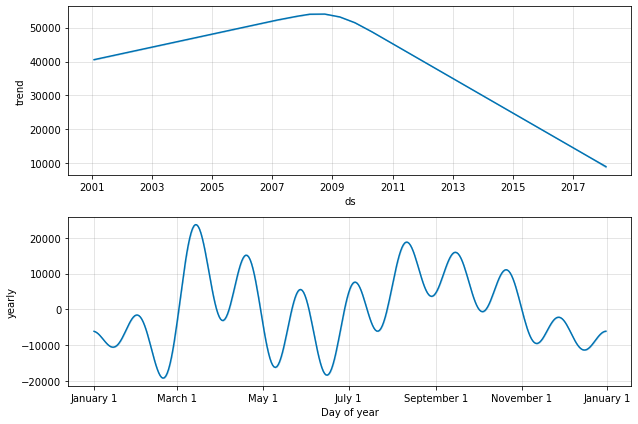

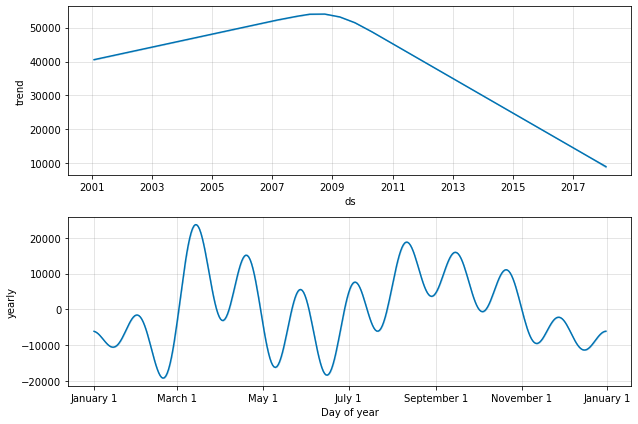

In [127]:
m.plot_components(forecast)